In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

full_data = pd.read_csv("data.csv", header=None)
category = full_data[0]
data = full_data.iloc[:, 1:]
labels = ('Length [mm]', 'Diameter [mm]', 'Height [mm]',
          'Whole weight [g]', 'Shucked weight [g]',
          'Viscera weight [g]', 'Shell weight [g]', 'Rings')

1. distribution of the qualitative variable in the dataset

In [2]:
table_1 = category.value_counts().reset_index()
table_1.columns = ['', 'count']
table_1['%'] = round((table_1['count'] / len(category)) * 100, 2)
table_1[''] = table_1[''].replace({'M': 'Male',
                                   'F': 'Female',
                                   'I': 'Infant'})
print(table_1.to_string(index=False))

        count     %
  Male   1528 36.58
Infant   1342 32.13
Female   1307 31.29


2. summary statistics for the quantitative variables in the dataset

In [3]:
data.columns = labels
table_2 = data.describe().T
table_2 = table_2[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(3)
print(table_2)

                     mean    std    min    25%    50%     75%     max
Length [mm]         0.524  0.120  0.075  0.450  0.545   0.615   0.815
Diameter [mm]       0.408  0.099  0.055  0.350  0.425   0.480   0.650
Height [mm]         0.140  0.042  0.000  0.115  0.140   0.165   1.130
Whole weight [g]    0.829  0.490  0.002  0.442  0.800   1.153   2.826
Shucked weight [g]  0.359  0.222  0.001  0.186  0.336   0.502   1.488
Viscera weight [g]  0.181  0.110  0.000  0.094  0.171   0.253   0.760
Shell weight [g]    0.239  0.139  0.002  0.130  0.234   0.329   1.005
Rings               9.934  3.224  1.000  8.000  9.000  11.000  29.000


3. bar chart of the counts of occurrences of each category for the qualitative variable in the dataset

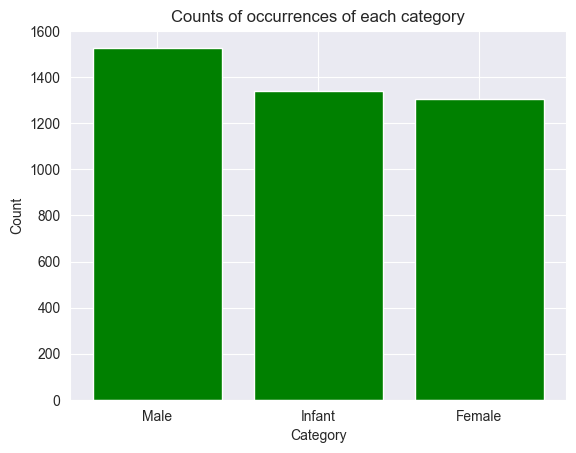

In [4]:
plt.bar(table_1[''], table_1['count'], color='green')
plt.title('Counts of occurrences of each category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

4. histogram of each quantitative variable in the dataset

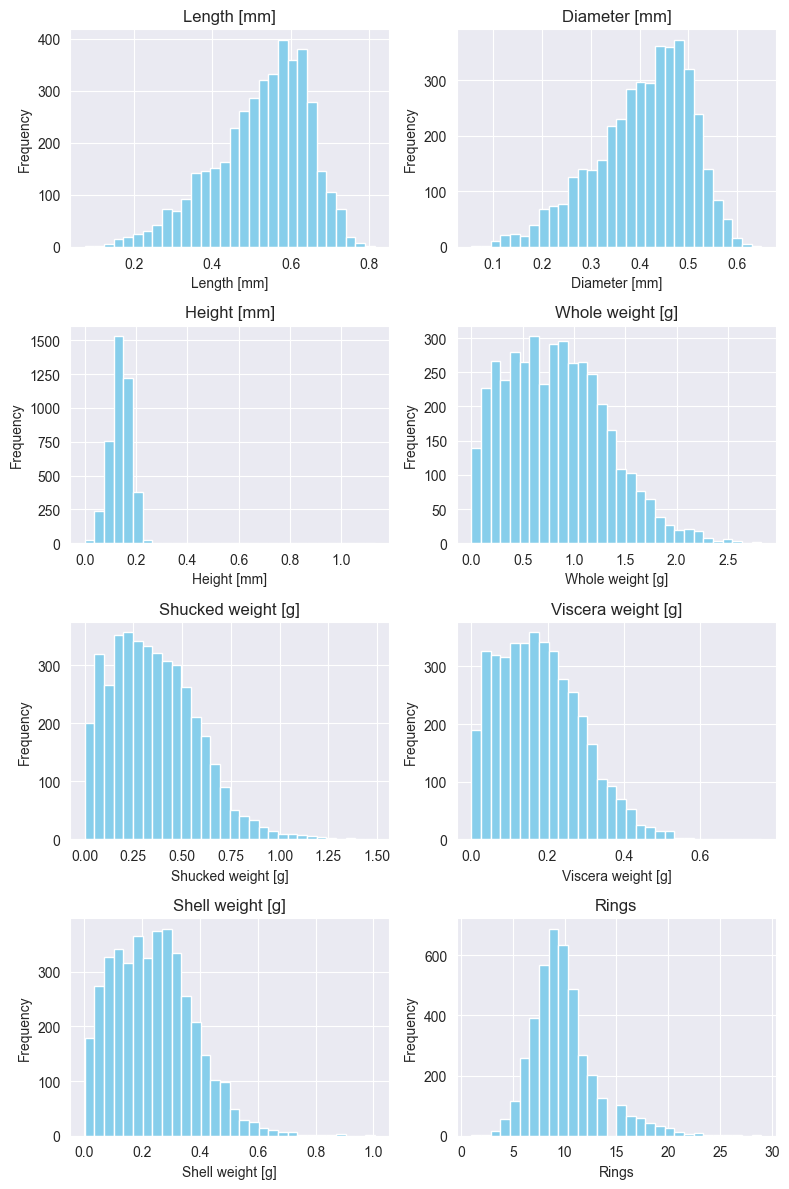

In [5]:
fig, axes = plt.subplots(4, 2, figsize=(8, 12))
axes = axes.flatten()
for i, label in enumerate(labels):
    axes[i].hist(data[label], bins=30, color='skyblue')
    axes[i].set_title(label)
    axes[i].set_xlabel(label)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

5. scatter plot for each pair of the quantitative variables in the dataset

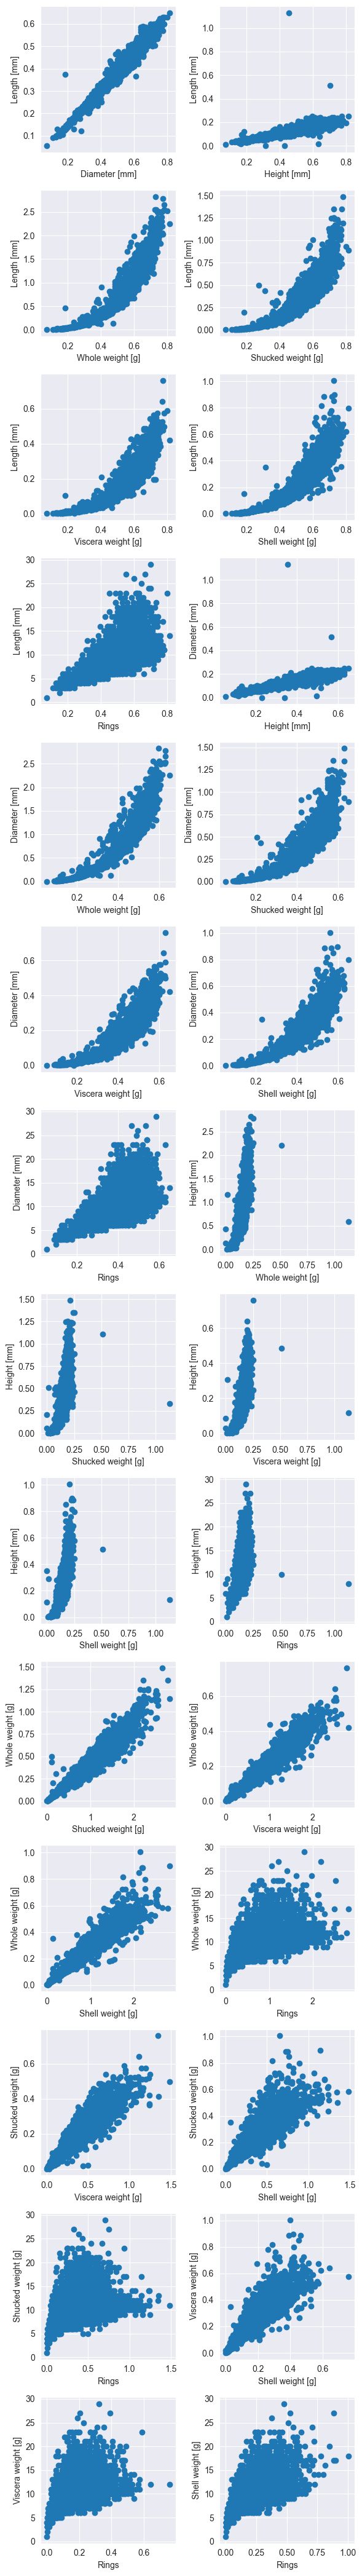

In [6]:
pairs = list(itertools.combinations(labels, 2))
fig, axes = plt.subplots(14, 2, figsize=(6, 42))
axes = axes.flatten()
for i, (first_label, second_label) in enumerate(pairs):
    axes[i].scatter(data[first_label], data[second_label])
    axes[i].set_ylabel(first_label)
    axes[i].set_xlabel(second_label)
plt.tight_layout()
plt.show()

6. table representing a linear correlation matrix of all quantitative variables in the dataset

In [7]:
correlation_matrix = data[list(labels)].corr()
correlation_matrix = correlation_matrix.round(3)
short_names = {
    'Length [mm]': 'L',
    'Diameter [mm]': 'D',
    'Height [mm]': 'H',
    'Whole weight [g]': 'W_W',
    'Shucked weight [g]': 'Shu_W',
    'Viscera weight [g]': 'V_W',
    'Shell weight [g]': 'She_W',
    'Rings': 'R'
}
correlation_matrix = correlation_matrix.rename(columns=short_names)
print(correlation_matrix)

                        L      D      H    W_W  Shu_W    V_W  She_W      R
Length [mm]         1.000  0.987  0.828  0.925  0.898  0.903  0.898  0.557
Diameter [mm]       0.987  1.000  0.834  0.925  0.893  0.900  0.905  0.575
Height [mm]         0.828  0.834  1.000  0.819  0.775  0.798  0.817  0.557
Whole weight [g]    0.925  0.925  0.819  1.000  0.969  0.966  0.955  0.540
Shucked weight [g]  0.898  0.893  0.775  0.969  1.000  0.932  0.883  0.421
Viscera weight [g]  0.903  0.900  0.798  0.966  0.932  1.000  0.908  0.504
Shell weight [g]    0.898  0.905  0.817  0.955  0.883  0.908  1.000  0.628
Rings               0.557  0.575  0.557  0.540  0.421  0.504  0.628  1.000


7. heatmap representing a linear correlation matrix of all quantitative variables in the dataset

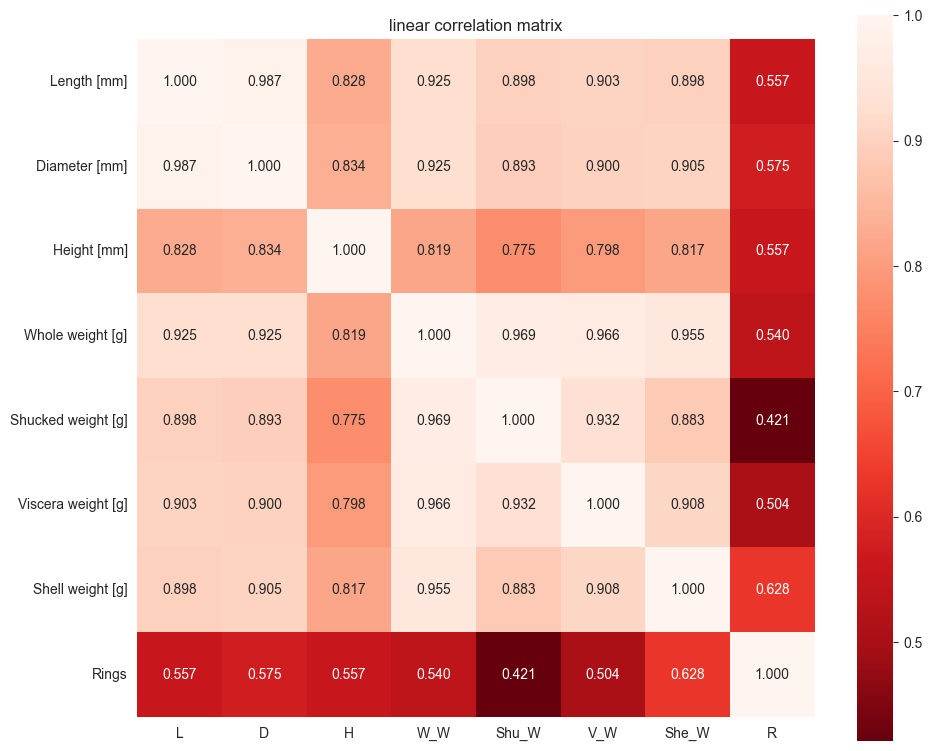

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f",
            cmap="Reds_r", cbar=True, square=True)
plt.title("linear correlation matrix")
plt.tight_layout()
plt.show()

8. linear regression plot with the two quantitative variables that are most strongly linearly correlated - hardcoded variables

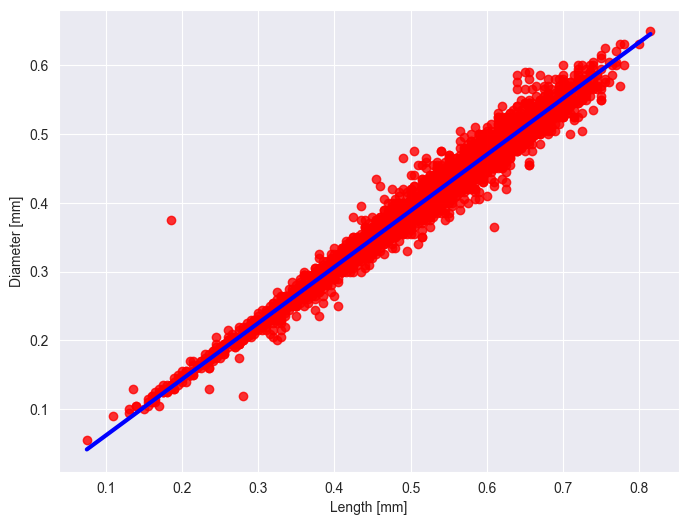

In [9]:
plt.figure(figsize=(8, 6))
x_label = 'Length [mm]'
y_label = 'Diameter [mm]'
sns.regplot(data, x=x_label, y=y_label,
            scatter_kws={'color': 'red'},
            line_kws={'color': 'blue', 'linewidth': 3})
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

Requirements for the maximum grade of 5

1. table with summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable

In [10]:
grouped_data = full_data
grouped_data.columns = ['Sex'] + list(labels)
grouped_data = grouped_data.groupby('Sex').describe().round(3)

table_3 = grouped_data.stack(future_stack=True, level=0)
table_3 = table_3[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
table_3.index.names = ['Sex', 'Feature']
table_3 = table_3.swaplevel('Sex', 'Feature')
table_3 = table_3.loc[list(labels)]
table_3 = table_3.rename(index={'M': 'Male',
                                'F': 'Female',
                                'I': 'Infant'}, level='Sex')
print(table_3)


                             mean    std    min    25%     50%     75%     max
Feature            Sex                                                        
Length [mm]        Female   0.579  0.086  0.275  0.525   0.590   0.640   0.815
                   Infant   0.428  0.109  0.075  0.360   0.435   0.510   0.725
                   Male     0.561  0.103  0.155  0.505   0.580   0.630   0.780
Diameter [mm]      Female   0.455  0.071  0.195  0.410   0.465   0.505   0.650
                   Infant   0.326  0.088  0.055  0.270   0.335   0.390   0.550
                   Male     0.439  0.084  0.110  0.395   0.455   0.500   0.630
Height [mm]        Female   0.158  0.040  0.015  0.140   0.160   0.175   1.130
                   Infant   0.108  0.032  0.000  0.085   0.110   0.130   0.220
                   Male     0.151  0.035  0.025  0.130   0.155   0.175   0.515
Whole weight [g]   Female   1.047  0.430  0.080  0.730   1.038   1.320   2.657
                   Infant   0.431  0.286  0.002  0.2

2. boxplot of each quantitative variable in the dataset, grouped by the qualitative variable

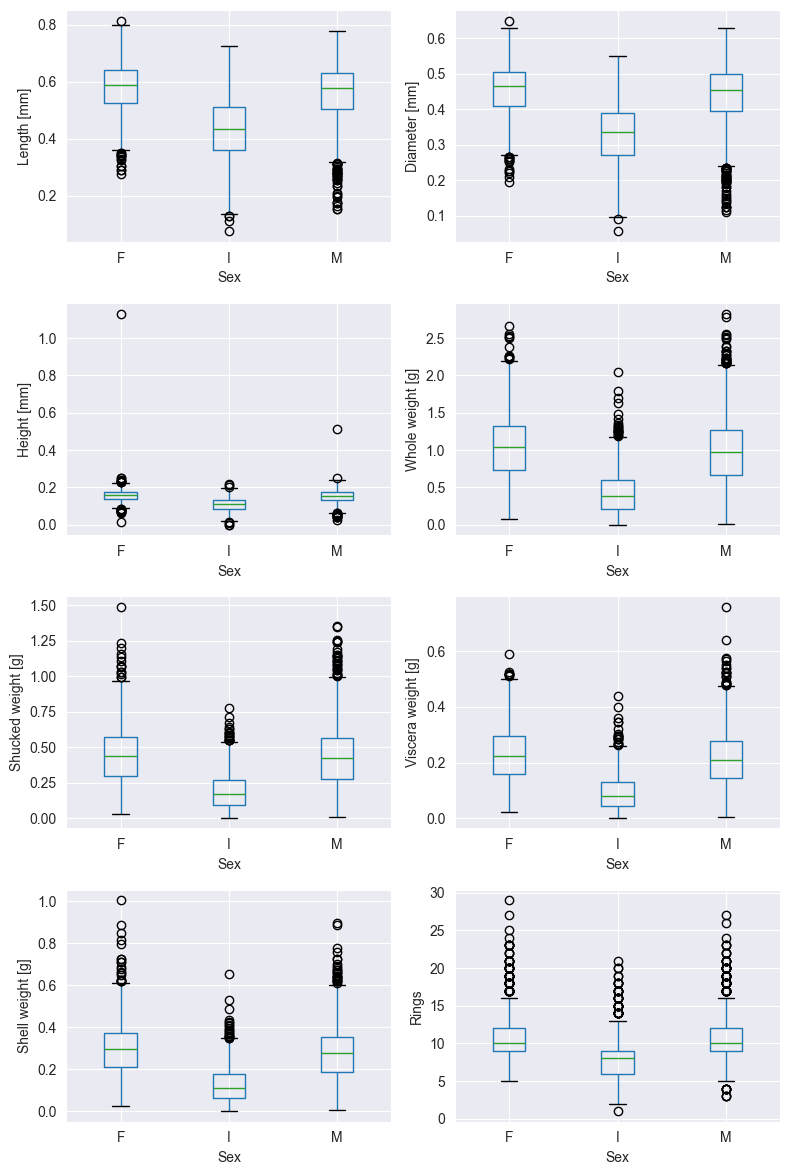

In [11]:
fig, axes = plt.subplots(4, 2, figsize=(8, 12))
axes = axes.flatten()

for i, label in enumerate(labels):
    full_data.boxplot(column=label, by='Sex', ax=axes[i])
    axes[i].set_title('')
    axes[i].set_xlabel('Sex')
    axes[i].set_ylabel(label)

plt.suptitle('')
plt.tight_layout()
plt.show()